## Network Diagram

### Method 2.1: GraphViz, which you probably won't use

In [1]:
import graphviz as gv

You can use GraphViz to make **undirected graphs** by adding edges. You can also add notes but hey, who cares!

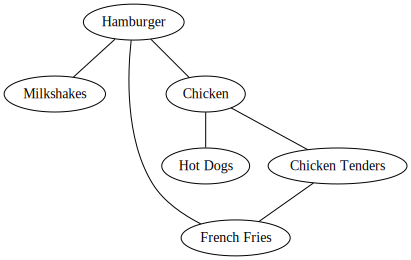

In [9]:
g = gv.Graph()

# g.node("Hamburgers")
# g.node("Milkshakes")
# g.node("French Fries")

g.edge("Hamburger", "Milkshakes")
g.edge("Hamburger", "French Fries")
g.edge("Hamburger", "Chicken")
g.edge("Chicken", "Hot Dogs")
g.edge("Chicken", "Chicken Tenders")
g.edge("Chicken Tenders", "French Fries")

g

If you want to get crazier, you can also make **directed graphs** and add **labels** to the connections.

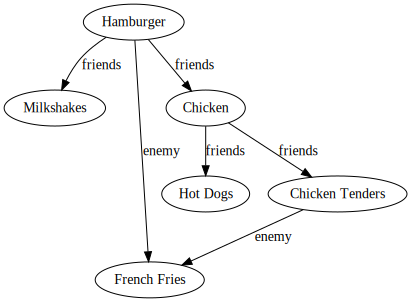

In [15]:
g = gv.Digraph()

g.edge("Hamburger", "Milkshakes", label="friends")
g.edge("Hamburger", "French Fries", label="enemy")
g.edge("Hamburger", "Chicken", label="friends")
g.edge("Chicken", "Hot Dogs", label="friends")
g.edge("Chicken", "Chicken Tenders", label="friends")
g.edge("Chicken Tenders", "French Fries", label="enemy")

g

### Method 2.2: NetworkX

NetworkX is **much cooler** than GraphViz! What's the real difference? Well... NetworkX is cooler?

```bash
pip3 install networkx
```

You might need to brew install something, too.

In [17]:
%matplotlib inline

import networkx as nx

In [23]:
import warnings
warnings.filterwarnings("ignore")

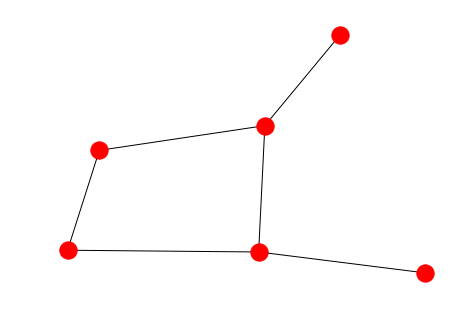

In [26]:
g = nx.Graph()

g.add_edge("Hamburger", "Milkshakes")
g.add_edge("Hamburger", "French Fries")
g.add_edge("Hamburger", "Chicken")
g.add_edge("Chicken", "Hot Dogs")
g.add_edge("Chicken", "Chicken Tenders")
g.add_edge("Chicken Tenders", "French Fries")

nx.draw(g)

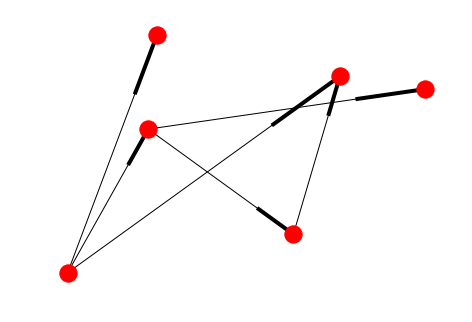

In [29]:
g = nx.DiGraph()

g.add_edge("Hamburger", "Milkshakes")
g.add_edge("Hamburger", "French Fries")
g.add_edge("Hamburger", "Chicken")
g.add_edge("Chicken", "Hot Dogs")
g.add_edge("Chicken", "Chicken Tenders")
g.add_edge("Chicken Tenders", "French Fries")

nx.draw(g)

## Dot products

First we'll start off with an **adjacency matrix**.

In [30]:
import pandas as pd

df = pd.DataFrame([
    { 'name': 'Dooru', 'Category A': 1, 'Category B': 1, 'Category C': 1, 'Category D': 0 },
    { 'name': 'Dida', 'Category A': 0, 'Category B': 1, 'Category C': 0, 'Category D': 0 },
    { 'name': 'Dreebo', 'Category A': 1, 'Category B': 0, 'Category C': 1, 'Category D': 0 },
    { 'name': 'Darby', 'Category A': 1, 'Category B': 1, 'Category C': 1, 'Category D': 0 },
    { 'name': 'Drabski', 'Category A': 0, 'Category B': 1, 'Category C': 1, 'Category D': 0 },
    { 'name': 'Doeri', 'Category A': 0, 'Category B': 0, 'Category C': 0, 'Category D': 1 }
])
df.set_index('name', inplace=True)
df

,Category A,Category B,Category C,Category D
name,,,,
Dooru,1,1,1,0
Dida,0,1,0,0
Dreebo,1,0,1,0
Darby,1,1,1,0
Drabski,0,1,1,0
Doeri,0,0,0,1


### What's connected to what?

How about cosine similarity?

In [31]:
from sklearn.metrics.pairwise import cosine_similarity

In [32]:
cosine_similarity(df.values)

array([[ 1.        ,  0.57735027,  0.81649658,  1.        ,  0.81649658,
         0.        ],
       [ 0.57735027,  1.        ,  0.        ,  0.57735027,  0.70710678,
         0.        ],
       [ 0.81649658,  0.        ,  1.        ,  0.81649658,  0.5       ,
         0.        ],
       [ 1.        ,  0.57735027,  0.81649658,  1.        ,  0.81649658,
         0.        ],
       [ 0.81649658,  0.70710678,  0.5       ,  0.81649658,  1.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ]])

In [33]:
similarity = cosine_similarity(df.values)
similarity_df = pd.DataFrame(similarity, columns=df.index, index=df.index)
similarity_df

name,Dooru,Dida,Dreebo,Darby,Drabski,Doeri
name,,,,,,
Dooru,1.000000,0.577350,0.816497,1.000000,0.816497,0.0
Dida,0.577350,1.000000,0.000000,0.577350,0.707107,0.0
Dreebo,0.816497,0.000000,1.000000,0.816497,0.500000,0.0
Darby,1.000000,0.577350,0.816497,1.000000,0.816497,0.0
Drabski,0.816497,0.707107,0.500000,0.816497,1.000000,0.0
Doeri,0.000000,0.000000,0.000000,0.000000,0.000000,1.0


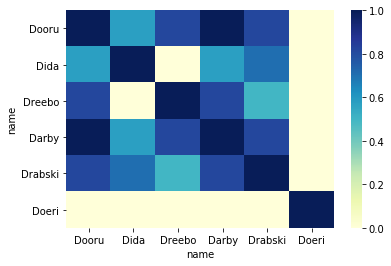

In [35]:
import seaborn as sns

sns.heatmap(similarity_df, cmap="YlGnBu")

### But we can do better!

Those numbers **don't mean anything**. We want a count of what's connected to what!

Let's talk about **dot products**! Or better yet, let's not talk about them, let's just do them.

In [38]:
# Transpose our dataframe
df.T

name,Dooru,Dida,Dreebo,Darby,Drabski,Doeri
Category A,1,0,1,1,0,0
Category B,1,1,0,1,1,0
Category C,1,0,1,1,1,0
Category D,0,0,0,0,0,1


In [39]:
df.dot(df.T)

name,Dooru,Dida,Dreebo,Darby,Drabski,Doeri
name,,,,,,
Dooru,3,1,2,3,2,0
Dida,1,1,0,1,1,0
Dreebo,2,0,2,2,1,0
Darby,3,1,2,3,2,0
Drabski,2,1,1,2,2,0
Doeri,0,0,0,0,0,1


In [40]:
df.T.dot(df)

,Category A,Category B,Category C,Category D
Category A,3,2,3,0
Category B,2,4,3,0
Category C,3,3,4,0
Category D,0,0,0,1


In [45]:
adjacency = df.dot(df.T)

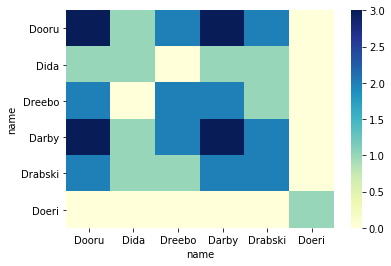

In [46]:
sns.heatmap(adjacency, cmap="YlGnBu")

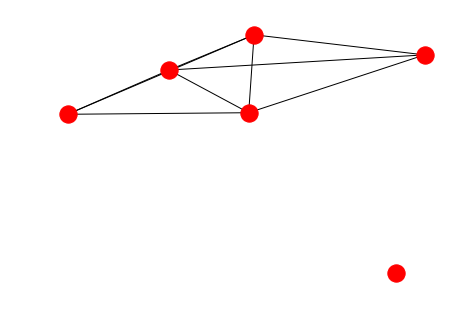

In [47]:
g = nx.from_numpy_matrix(adjacency.values)
nx.draw(g)

## Finding Paul Revere

In [48]:
df = pd.read_csv("clubs.csv")
df.head(3)

,name,club
0,Adams John,North Caucus
1,Adams John,Long Room Club
2,Adams Samuel,North Caucus


### Convert to `0`/`1` as columns

In [49]:
df.set_index('name', inplace=True)
df.head(3)

,club
name,
Adams John,North Caucus
Adams John,Long Room Club
Adams Samuel,North Caucus


In [50]:
# Pivot and then make True or False and then make it into an integer
matrix = df.pivot(columns='club', values='club').astype(bool).astype(int)
matrix.head()

club,Boston Committee,London Enemies,Long Room Club,Loyal Nine,North Caucus,St Andrews Lodge,Tea Party
name,,,,,,,
Adams John,0,0,1,0,1,0,0
Adams Samuel,1,1,1,0,1,0,0
Allen Dr,0,0,0,0,1,0,0
Appleton Nathaniel,1,0,0,0,1,0,0
Ash Gilbert,0,0,0,0,0,1,0


In [52]:
matrix.dot(matrix.T)

name,Adams John,Adams Samuel,Allen Dr,Appleton Nathaniel,Ash Gilbert,Austin Benjamin,Austin Samuel,Avery John,Baldwin Cyrus,Ballard John,...,Whitwell William,Williams Jeremiah,Williams Jonathan,Williams Thomas,Willis Nathaniel,Wingfield William,Winslow John,Winthrop John,Wyeth Joshua,Young Thomas
name,,,,,,,,,,,,,,,,,,,,,
Adams John,2,2,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,1,0,1
Adams Samuel,2,4,1,2,0,1,1,1,1,1,...,1,0,1,0,0,0,1,2,0,2
Allen Dr,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
Appleton Nathaniel,1,2,1,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,2
Ash Gilbert,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
Austin Benjamin,0,1,0,0,0,1,1,1,1,0,...,1,0,1,0,0,0,0,1,0,0
Austin Samuel,0,1,0,0,0,1,1,1,1,0,...,1,0,1,0,0,0,0,1,0,0
Avery John,0,1,0,0,0,1,1,2,1,0,...,1,0,1,0,0,0,0,1,0,0
Baldwin Cyrus,0,1,0,0,0,1,1,1,1,0,...,1,0,1,0,0,0,0,1,0,0


In [53]:
matrix.T.dot(matrix)

club,Boston Committee,London Enemies,Long Room Club,Loyal Nine,North Caucus,St Andrews Lodge,Tea Party
club,,,,,,,
Boston Committee,21,11,5,0,9,1,3
London Enemies,11,62,5,3,16,3,8
Long Room Club,5,5,17,0,5,2,2
Loyal Nine,0,3,0,10,3,2,2
North Caucus,9,16,5,3,59,3,13
St Andrews Lodge,1,3,2,2,3,53,3
Tea Party,3,8,2,2,13,3,97


In [55]:
club_adj = matrix.T.dot(matrix)

## What are the connected clubs?

TypeError: 'module' object is not callable

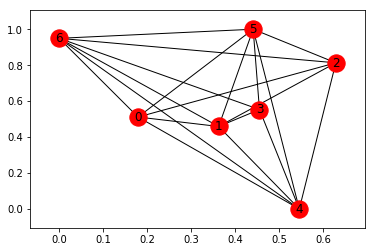

In [59]:
import matplotlib as plt

club_adj = nx.from_numpy_matrix(club_adj.values)

pos=nx.spring_layout(club_adj,iterations=20)
nx.draw_networkx_edges(club_adj, pos)
nx.draw_networkx_nodes(club_adj, pos)
nx.draw_networkx_labels(club_adj, pos)
plt.axis("off")
plt.show()

## The connected people?

## No wait, let's use math to find the most connected people instead

In [ ]:
# person_adjacency_graph_centrality=nx.eigenvector_centrality(person_adjacency_graph, max_iter=30)
# person_adjacency_graph_centrality

In [ ]:
# for name in sorted(person_adjacency_graph_centrality, key=person_adjacency_graph_centrality.get, reverse=True)[0:10]:
#     print(name, person_adjacency_graph_centrality[name])